# ⏩ Järjestikagentide töövood GitHubi mudelitega (Python)

## 📋 Täiustatud järjestikprotsesside õpetus

See märkmik tutvustab **järjestikprotsesside mustreid** Microsoft Agent Frameworki abil. Õpid looma keerukaid mitmeastmelisi töötlemistorusid, kus agendid tegutsevad kindlas järjekorras, edastades andmeid ja konteksti etappide vahel.

## 🎯 Õpieesmärgid

### 🔄 **Järjestikprotsesside mustrid**
- **Lineaarse töövoo kujundamine**: Loo samm-sammult töötlemistorusid
- **Andmevoo haldamine**: Edasta teavet järjestikagentide vahel
- **Etapivärava töötlemine**: Rakenda kontrollpunkte ja valideerimisetappe
- **Edenemise jälgimine**: Jälgi töövoo täitmist ja vahetulemusi

### 🏗️ **Ettevõtte toru arhitektuur**
- **Äriprotsesside modelleerimine**: Kaardista reaalsed äriprotsessid agentide töövoogudeks
- **Kvaliteedikontroll**: Mitmeetapilised valideerimis- ja ülevaatusprotsessid
- **Dokumentide töötlemine**: Järjestik dokumentide analüüs ja teisendamine
- **Sisu tootmine**: Toimetuslikud töövood koos ülevaatuse ja kinnitamise etappidega

### 📊 **Täiustatud töövoo funktsioonid**
- **Konteksti säilitamine**: Säilita olek töövoo etappide vahel
- **Vigade levik**: Halda tõrkeid järjestikprotsessides
- **Jõudluse optimeerimine**: Tõhusad järjestiktäitmise mustrid
- **Auditijäljed**: Järjestikoperatsioonide täielik jälgimine

## ⚙️ Eeldused ja seadistamine

### 📦 **Sõltuvused**
```bash
pip install agent-framework-core -U
```

### 🔑 **Konfiguratsioon**
```env
GITHUB_TOKEN=your_github_personal_access_token
GITHUB_ENDPOINT=https://models.inference.ai.azure.com
GITHUB_MODEL_ID=gpt-4o-mini
```

## 🏢 **Ettevõtte järjestik töövoo kasutusjuhtumid**

### 📝 **Dokumentide töötlemise toru**
```
Raw Document → Content Extraction → Analysis → Validation → Final Output
```

### 🔍 **Kvaliteedikontrolli töövoog** 
```
Initial Review → Technical Validation → Compliance Check → Final Approval
```

### 📰 **Sisu tootmise toru**
```
Research → Writing → Editing → Review → Publishing
```

### 💼 **Äriprotsesside automatiseerimine**
```
Data Collection → Processing → Analysis → Report Generation → Distribution
```

## 🎨 **Järjestik töövoo kujundamise põhimõtted**

- **🔗 Lineaarne edenemine**: Iga etapp sõltub eelneva etapi väljundist
- **📋 Oleku haldamine**: Säilita kontekst ja andmed kõigis etappides
- **🛡️ Vigade käsitlemine**: Tõrgete sujuv haldamine igas etapis
- **📊 Edenemise jälgimine**: Jälgi iga etapi täitmist ja jõudlust
- **🔄 Etappide taaskasutatavus**: Kujunda taaskasutatavaid töövoo komponente

Hakkame looma keerukaid järjestikprotsesside töövooge! 🚀


In [1]:
! pip install agent-framework-core -U

In [2]:
from agent_framework.openai import OpenAIChatClient
from agent_framework import ChatMessage, DataContent, Role, TextContent,WorkflowBuilder,  WorkflowEvent,WorkflowViz

In [3]:

import os
import base64
from dotenv import load_dotenv

In [4]:
load_dotenv()

True

In [5]:
chat_client = OpenAIChatClient(base_url=os.environ.get("GITHUB_ENDPOINT"), api_key=os.environ.get("GITHUB_TOKEN"), model_id="gpt-4o" )

In [6]:
SalesAgentName = "Sales-Agent"
SalesAgentInstructions = "You are my furniture sales consultant, you can find different furniture elements from the pictures and give me a purchase suggestion"

In [7]:
PriceAgentName = "Price-Agent"
PriceAgentInstructions = """You are a furniture pricing specialist and budget consultant. Your responsibilities include:
        1. Analyze furniture items and provide realistic price ranges based on quality, brand, and market standards
        2. Break down pricing by individual furniture pieces
        3. Provide budget-friendly alternatives and premium options
        4. Consider different price tiers (budget, mid-range, premium)
        5. Include estimated total costs for room setups
        6. Suggest where to find the best deals and shopping recommendations
        7. Factor in additional costs like delivery, assembly, and accessories
        8. Provide seasonal pricing insights and best times to buy
        Always format your response with clear price breakdowns and explanations for the pricing rationale."""

In [8]:
QuoteAgentName = "Quote-Agent"
QuoteAgentInstructions = """You are a assistant that create a quote for furniture purchase.
        1. Create a well-structured quote document that includes:
        2. A title page with the document title, date, and client name
        3. An introduction summarizing the purpose of the document
        4. A summary section with total estimated costs and recommendations
        5. Use clear headings, bullet points, and tables for easy readability
        6. All quotes are presented in markdown form"""

In [9]:
sales_agent   = chat_client.create_agent(
        instructions=(
           SalesAgentInstructions
        ),
        name=SalesAgentName,
    )

price_agent = chat_client.create_agent(
        instructions=(
            PriceAgentInstructions
        ),
        name=PriceAgentName,
    )

quote_agent = chat_client.create_agent(
        instructions=(
            QuoteAgentInstructions
        ),
        name=QuoteAgentName,
    )


In [10]:
workflow = WorkflowBuilder().set_start_executor(sales_agent).add_edge(sales_agent, price_agent).add_edge(price_agent, quote_agent).build()

In [11]:
print("Generating workflow visualization...")
viz = WorkflowViz(workflow)
# Print out the mermaid string.
print("Mermaid string: \n=======")
print(viz.to_mermaid())
print("=======")
# Print out the DiGraph string.
print("DiGraph string: \n=======")
print(viz.to_digraph())
print("=======")
svg_file = viz.export(format="svg")
print(f"SVG file saved to: {svg_file}")

Generating workflow visualization...
Mermaid string: 
flowchart TD
  Sales_Agent["Sales-Agent (Start)"];
  Price_Agent["Price-Agent"];
  Quote_Agent["Quote-Agent"];
  Sales_Agent --> Price_Agent;
  Price_Agent --> Quote_Agent;
DiGraph string: 
digraph Workflow {
  rankdir=TD;
  node [shape=box, style=filled, fillcolor=lightblue];
  edge [color=black, arrowhead=vee];

  "Sales-Agent" [fillcolor=lightgreen, label="Sales-Agent\n(Start)"];
  "Price-Agent" [label="Price-Agent"];
  "Quote-Agent" [label="Quote-Agent"];
  "Sales-Agent" -> "Price-Agent";
  "Price-Agent" -> "Quote-Agent";
}
SVG file saved to: C:\Users\kinfeylo\AppData\Local\Temp\tmpu6dtvyds.svg


In [12]:
class DatabaseEvent(WorkflowEvent): ...

Attempting to display SVG file at: C:\Users\kinfeylo\AppData\Local\Temp\tmpu6dtvyds.svg


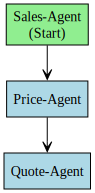

In [13]:
# Display the exported workflow SVG inline in the notebook

from IPython.display import SVG, display, HTML
import os

print(f"Attempting to display SVG file at: {svg_file}")

if svg_file and os.path.exists(svg_file):
    try:
        # Preferred: direct SVG rendering
        display(SVG(filename=svg_file))
    except Exception as e:
        print(f"⚠️ Direct SVG render failed: {e}. Falling back to raw HTML.")
        try:
            with open(svg_file, "r", encoding="utf-8") as f:
                svg_text = f.read()
            display(HTML(svg_text))
        except Exception as inner:
            print(f"❌ Fallback HTML render also failed: {inner}")
else:
    print("❌ SVG file not found. Ensure viz.export(format='svg') ran successfully.")

In [14]:
image_path = "../imgs/home.png"
with open(image_path, "rb") as image_file:
    image_b64 = base64.b64encode(image_file.read()).decode()
image_uri = f"data:image/png;base64,{image_b64}"


In [15]:
message = ChatMessage(
        role=Role.USER,
        contents=[
            TextContent(text="Please find the relevant furniture according to the image and give the corresponding price for each piece of furniture"),
            DataContent(uri=image_uri, media_type="image/png")
        ]
)

In [16]:
result=''
async for event in workflow.run_stream(message):
    if isinstance(event, DatabaseEvent):
        print(f"{event}")
    if isinstance(event, WorkflowEvent):
        result += str(event.data)

In [17]:
result.replace("None", "")

'Here is a breakdown of the furniture and decor elements in the room with suggestions and approximate prices:\n\n1. **Sofa (White Modern Style)**  \n   - **Suggestion**: A 3-seater contemporary fabric sofa with cushions.  \n   - **Estimated Price**: $800 - $1,200  \n\n2. **Accent Chair (Dark Blue)**  \n   - **Suggestion**: A high-back navy blue velvet lounge chair.  \n   - **Estimated Price**: $300 - $500  \n\n3. **Coffee Table (Oval, White Marble Top with Wooden Base)**  \n   - **Suggestion**: Oval-shaped coffee table with a faux marble top and wooden legs.  \n   - **Estimated Price**: $250 - $400  \n\n4. **TV Console (Light Wood Finish)**  \n   - **Suggestion**: A sleek modern TV stand with storage drawers.  \n   - **Estimated Price**: $300 - $600  \n\n5. **Lighting (Ceiling Chandelier - Black with Glass Globes)**  \n   - **Suggestion**: Black contemporary chandelier with multiple glass globes.  \n   - **Estimated Price**: $200 - $400  \n\n6. **Side Table with Decorative Elements (Ne


---

**Lahtiütlus**:  
See dokument on tõlgitud AI tõlketeenuse [Co-op Translator](https://github.com/Azure/co-op-translator) abil. Kuigi püüame tagada täpsust, palume arvestada, et automaatsed tõlked võivad sisaldada vigu või ebatäpsusi. Algne dokument selle algses keeles tuleks pidada autoriteetseks allikaks. Olulise teabe puhul soovitame kasutada professionaalset inimtõlget. Me ei vastuta selle tõlke kasutamisest tulenevate arusaamatuste või valesti tõlgenduste eest.
